In [40]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

In [41]:
df=pd.read_csv('Dataset_GMSalary_wnan.csv')

In [42]:
df_2=df.iloc[:,2:]
df_2.describe()

,FPYear,EDegree,GMSalary,GLArea,CMValue,CRate,PMotor,PHousehold,PHealth,PLife,PCompensations,childrennovo
count,10292.000000,10292.000000,10292.000000,10292.000000,10267.000000,10277.000000,10286.000000,10169.000000,10288.000000,10134.000000,10126.000000,10292.000000
mean,1991.048776,1.479693,4995.917343,2.709483,217.360619,0.679853,296.017130,194.831975,167.208976,38.292206,37.399691,0.707151
std,510.621709,0.795158,1968.863807,1.266284,255.718810,0.319091,138.940014,208.631613,74.885772,40.227701,39.207817,0.455092
min,1974.000000,0.000000,665.000000,1.000000,-490.200000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,0.000000
25%,1980.000000,1.000000,3409.750000,1.000000,-9.220000,0.392249,189.757500,48.900000,110.910000,9.780000,9.890000,0.000000
50%,1986.000000,2.000000,5002.000000,3.000000,187.040000,0.719169,298.335000,131.700000,162.030000,24.560000,24.670000,1.000000
75%,1992.000000,2.000000,6580.000000,4.000000,399.080000,0.976113,407.410000,281.150000,218.930000,54.900000,53.230000,1.000000
max,53784.000000,3.000000,10042.000000,4.000000,1571.760000,1.620145,585.220000,1011.850000,442.860000,198.260000,192.370000,1.000000


In [43]:
df_2[['CMValue','CRate','PMotor','PHousehold','PHealth','PLife','PCompensations']] = df_2[['CMValue','CRate','PMotor','PHousehold','PHealth','PLife','PCompensations']].fillna(value=df_2[['CMValue','CRate','PMotor','PHousehold','PHealth','PLife','PCompensations']].mean())

In [17]:
#df_2.to_excel('C:\\Users\\FilipeSousa\\Desktop\\Challenge-Closer-Academy-\\Project\\Dataset_GMSalary_clean.xlsx')

In [44]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [45]:
X=df_2.iloc[:,:].values

In [46]:
scaler=MinMaxScaler()
scaled_features = scaler.fit_transform(X)

In [47]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 20,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

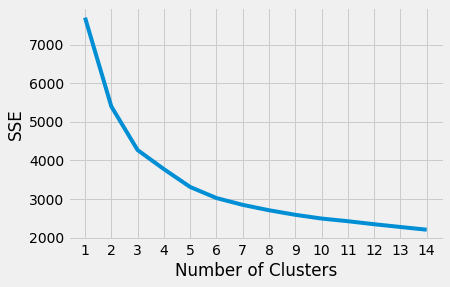

In [35]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 15), sse)
 plt.xticks(range(1, 15))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [36]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [37]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

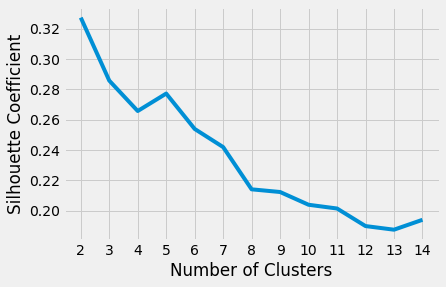

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

K MEANS PIPELINE TRY


In [48]:
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.mixture import GaussianMixture

In [51]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [71]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=8,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [72]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [73]:
pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_init=50,
                                         random_state=42))]))])

In [74]:
preprocessed_data = pipe["preprocessor"].transform(X)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)


0.6880003250983877

C:\Users\FilipeSousa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


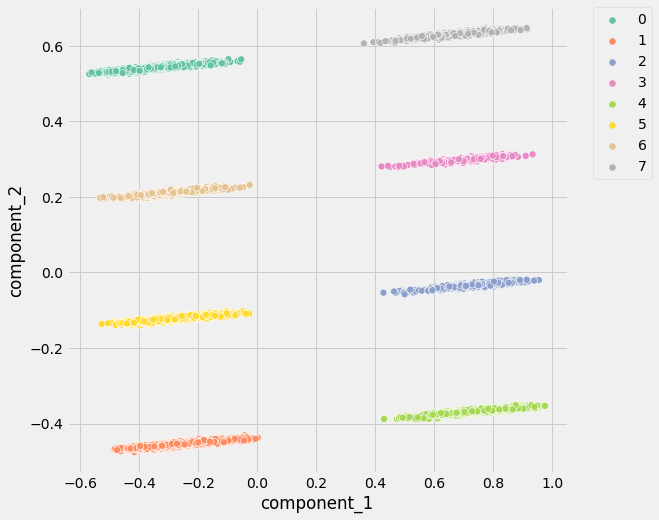

In [75]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()